In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.optimize import differential_evolution
from scipy.optimize import minimize
from scipy.stats import norm
%matplotlib inline

In [ ]:
#Задание 1: Вычислите производную функции tg^2(sin(x) + cos(2x+3))  в точке x0=1
import sympy as sym
x = sym.Symbol('x')
# Функция f(x) = tg**2(sin(x) + cos(2*x+3))
f = sym.tan(sym.sin(x) + sym.cos(2*x+3))**2

In [ ]:
# Вычисление частной производной по x
df_dx = sym.diff(f, x)
print("Частная производная по x:", df_dx)

Частная производная по x: 2*(-2*sin(2*x + 3) + cos(x))*(tan(sin(x) + cos(2*x + 3))**2 + 1)*tan(sin(x) + cos(2*x + 3))


In [ ]:
# Вычисление значения производной в точке x0=1
x0 = 1
value = df_dx.subs(x, x0)

print("Значение производной в точке x0=1:", value)

Значение производной в точке x0=1: 2*(1 + tan(cos(5) + sin(1))**2)*(cos(1) - 2*sin(5))*tan(cos(5) + sin(1))


(-200.0, 200.0)

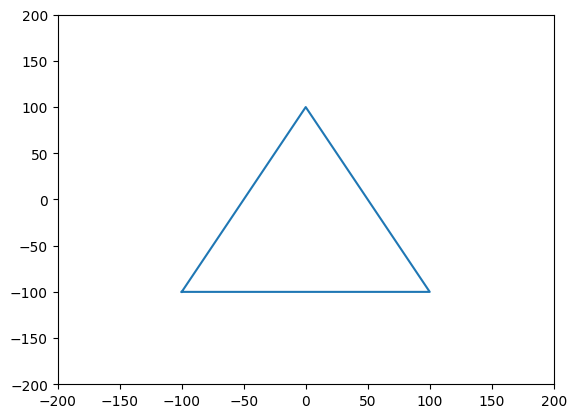

In [ ]:
#зАДАНИЕ 2
#Дан объект в 2D-пространстве
import numpy as np
import matplotlib.pyplot as plt

A = [
[-100, -100, 1],
[0, 100, 1],
[100, -100, 1],
[-100, -100, 1]
]

A = np.array(A)

x = A[:,0]
y = A[:,1]
plt.plot(x, y)
plt.ylim([-200, 200])
plt.xlim([-200, 200])

(-200.0, 200.0)

In [ ]:
#Матрица трансформаций на (0.5,1.2)
S = [
    [0.5, 0, 0],
    [0, 1.2, 0],
    [0, 0, 1]
]

In [ ]:
#Матрица для смещения (200,300)
T = [
    [1, 0, 200],
    [0, 1, 300],
    [0, 0, 1]
]

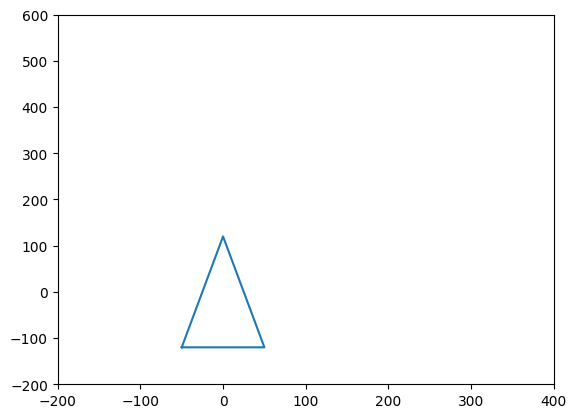

In [ ]:
# Выполняем масштабирование и смещение объекта
transformed_A = np.dot(np.dot(A, S), T)

# Получаем новые координаты объекта
x = transformed_A[:, 0]
y = transformed_A[:, 1]

# Отображаем объект
plt.plot(x, y)
plt.ylim([-200, 600])
plt.xlim([-200, 400])
plt.show()

In [ ]:
#Задание 3
# Найти собственные значения и собственные вектора матрицы
m = np.array([[1, 4],
              [1, 1]])
print(m)
# Находим собственные значения и собственные векторы
eigen_values, eigen_vectors = np.linalg.eig(m)

print("Собственные значения:", eigen_values)
print("Собственные векторы:")
for i in range(len(eigen_vectors)):
    print(eigen_vectors[:, i])

[[1 4]
 [1 1]]
Собственные значения: [ 3. -1.]
Собственные векторы:
[0.89442719 0.4472136 ]
[-0.89442719  0.4472136 ]


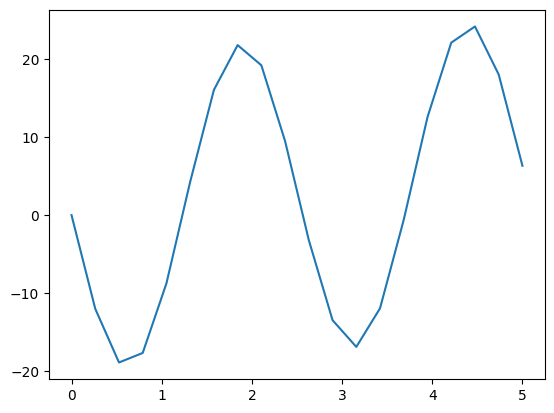

In [ ]:
#Задание 4
def f(x, a, b):
    return np.e**a * np.sin(b*x) + x


x = np.array([0.        , 0.26315789, 0.52631579, 0.78947368, 1.05263158,
              1.31578947, 1.57894737, 1.84210526, 2.10526316, 2.36842105,
              2.63157895, 2.89473684, 3.15789474, 3.42105263, 3.68421053,
              3.94736842, 4.21052632, 4.47368421, 4.73684211, 5.        ])

fx = np.array([  0.        , -12.01819092, -18.90968634, -17.68786571,
                -8.7529108 ,   4.27524517,  16.06801336,  21.81250213,
                19.22059845,   9.48411207,  -3.22273056, -13.48576488,
               -16.91096359, -11.95866834,  -0.58630088,  12.56873816,
                22.12489421,  24.20292139,  18.04522521,   6.33211092])


plt.plot(x, fx)
plt.show()


def error(params):
    return np.sum(np.abs(fx - f(x, params[0], params[1])))

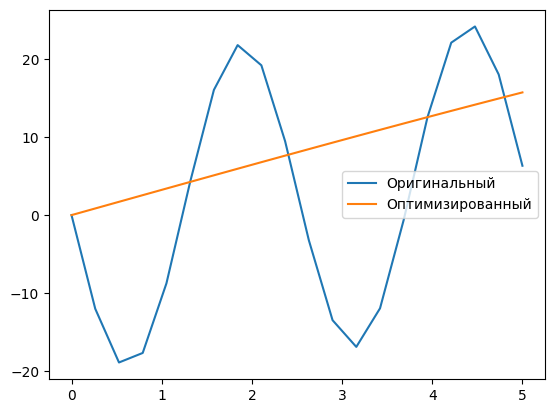

Оптимальные параметры: a = 3.0994304102247567 , b = 0.10110126757351803


In [ ]:
params_init = [0, 0]
result = minimize(error, params_init)
optimal_params = result.x
plt.plot(x, fx, label="Оригинальный")
plt.plot(x, f(x, opt_params[0], opt_params[1]), label="Оптимизированный")
plt.legend()
plt.show()
print("Оптимальные параметры: a =", optimal_params[0], ", b =", optimal_params[1])

In [ ]:
from sklearn.metrics.pairwise import cosine_similarity
raitings = np.array([[ 4,  4,  9,  4,  1,  6, 10,  7,  9,  6,  9,  2,  8,  6,  6],
                     [ 9,  2,  5, 10,  7,  8, 10,  5,  6,  2,  1,  6,  8,  9,  7],
                     [ 1,  6,  8,  8,  4,  9,  3,  8, 10,  5,  2,  6,  8,  1,  6],
                     [ 6,  1,  9,  7,  7,  9,  2,  3,  5,  1,  6,  6,  3,  2,  7],
                     [ 3,  7,  3,  5,  7,  9,  9,  6,  2,  9,  1,  2,  8, 10,  6],
                     [ 8,  3,  7,  3,  8,  6,  1,  8,  8,  6,  1,  9,  4, 10,  1],
                     [ 9,  8,  4,  8,  8, 10,  6,  1,  1,  2,  9,  5,  2,  7,  2],
                     [ 4,  1,  6,  4,  3, 10,  4,  4,  2,  8,  7,  9,  3,  8,  3],
                     [ 2,  7,  7,  6, 10,  6,  8,  9,  8,  6, 10,  1,  7, 10,  4],
                     [ 5, 10,  8,  8,  9,  7,  2,  9,  9, 10,  8,  8,  8,  6, 10]])
# Вычисление косинусной метрики между парами пользователей
cos_sim = cosine_similarity(raitings)

# Нахождение наиболее похожего пользователя для каждого пользователя
most_similar_users = []
for i in range(cos_sim.shape[0]):
    sorted_similarities = np.argsort(cos_sim[i])[::-1]  # Сортировка по убыванию
    most_similar_user = sorted_similarities[1]  # Индекс пользователя с наибольшей метрикой (исключая текущего пользователя)
    most_similar_users.append((i, most_similar_user))

# Вывод результатов
for pair in most_similar_users:
    print(f"({pair[0]}, {pair[1]})")

(0, 8)
(1, 4)
(2, 9)
(3, 9)
(4, 8)
(5, 9)
(6, 3)
(7, 5)
(8, 0)
(9, 2)
